## Feature Engineering

In [170]:
import sys
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly_express as px
from datetime import datetime, timedelta

# The src folder is not detected, modification to enable read of src module
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [171]:
from src.paths import TRANSFORMED_DATA_DIR, MODELS_DIR


Read the transformed data created after intial exploration of the data set

In [172]:
# Read the transformed data
wind_farms_data_linearinterpolated = pd.read_parquet(f'{TRANSFORMED_DATA_DIR}/wind_farm_linear_interpolated.parquet')  

In [173]:
# Missing Observation column is not required as a feature. The value can be utilized if further investigation is required for these data points  
wind_farms_data_linearinterpolated.drop(columns=['Missing_Observation'], inplace=True, axis=1)
wind_farms_data_linearinterpolated.head()

,CF,WS_1133733,WS_1156770,WS_1156968,WS_1182195,WS_1193865,WS_1321569,WS_1324653,WS_1358699,WS_1366338,...,WS_875373,WS_883683,WS_883699,WS_914573,WS_918665,WS_920775,WS_921049,day_of_week,month,time_of_day
2019-08-07 00:00:00,0.652524,10.35,8.99,4.57,9.69,8.90,2.90,5.74,1.16,8.81,...,11.63,10.72,10.55,11.41,10.77,10.17,9.24,2,8,0
2019-08-07 01:00:00,0.605852,9.70,8.28,5.78,9.10,7.98,2.23,3.46,0.97,7.75,...,11.10,11.02,9.91,11.16,10.98,10.16,9.09,2,8,1
2019-08-07 02:00:00,0.564094,9.04,7.39,6.21,8.98,7.78,1.98,2.62,0.92,7.55,...,10.74,11.19,9.52,11.00,11.10,10.04,9.04,2,8,2
2019-08-07 03:00:00,0.532721,8.78,7.49,6.43,8.84,7.82,1.33,2.43,0.68,7.53,...,10.65,11.27,9.11,10.93,11.18,10.20,8.89,2,8,3
2019-08-07 04:00:00,0.495608,8.23,6.88,6.81,8.52,6.65,1.64,2.45,0.59,6.40,...,9.78,10.85,8.64,10.69,10.83,9.88,8.67,2,8,4


Feature importance using tree based methods. Identify the most imprtant features to enable reduction of the feature space.

In [174]:
# Feature Importance using random forest  

from sklearn.ensemble import RandomForestRegressor

X = wind_farms_data_linearinterpolated.values[:,1:]
y = wind_farms_data_linearinterpolated.values[:,0]

# fit rnadom forest model
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X,y)
display(model.feature_importances_)



array([6.33600676e-03, 1.70338109e-03, 2.77844530e-03, 1.37531582e-03,
       2.97819462e-03, 2.41018622e-03, 3.29001409e-03, 3.88859491e-03,
       3.07403151e-03, 2.07484886e-03, 1.39065363e-03, 1.86830339e-03,
       9.28070688e-03, 3.40830068e-02, 1.47464101e-03, 1.94337535e-03,
       4.06686171e-03, 2.03355563e-03, 2.03907725e-03, 1.27258517e-03,
       2.13001205e-03, 1.46852161e-03, 2.34917123e-03, 2.49241178e-03,
       2.58353060e-03, 2.80149722e-03, 5.50411075e-04, 1.30427464e-03,
       2.89356910e-03, 3.57800146e-03, 1.55402372e-03, 1.04969278e-03,
       7.68294009e-04, 1.76062519e-03, 1.18259192e-02, 2.87348472e-03,
       4.59534661e-03, 1.23679117e-02, 2.79536981e-03, 8.86594328e-03,
       7.62375655e-04, 8.12513584e-04, 9.91071311e-04, 6.43825066e-01,
       4.14614931e-03, 3.28055465e-02, 7.14993205e-04, 2.04318161e-03,
       5.05705432e-04, 1.83551820e-03, 9.91236453e-04, 3.74196925e-04,
       2.42603218e-03, 8.82498364e-04, 1.18826430e-03, 2.10322649e-03,
      

<Axes: >

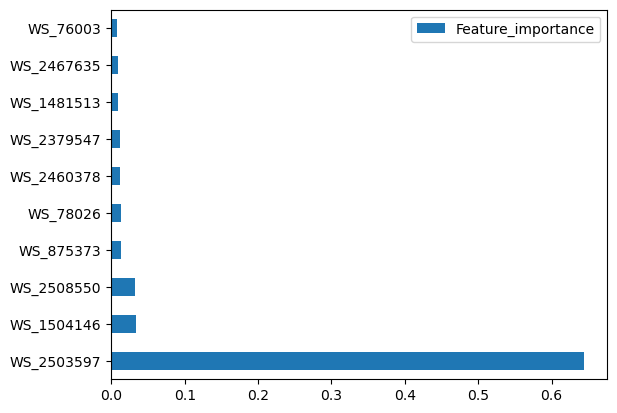

In [175]:
x_names = wind_farms_data_linearinterpolated.columns.values[1:]
x_ticks = [tick for tick in range(len(x_names))]
# plt.bar(model.feature_importances_, x_ticks)
# plt.yticks( x_names, x_ticks)
# plt.show()

df =pd.DataFrame(model.feature_importances_, x_names)
df.rename(columns={0: "Feature_importance"}, inplace=True)
pd.set_option('display.max_rows', 500)
df_sorted = df.sort_values(by='Feature_importance', ascending=False).head(10)

df_sorted.plot(kind='barh')

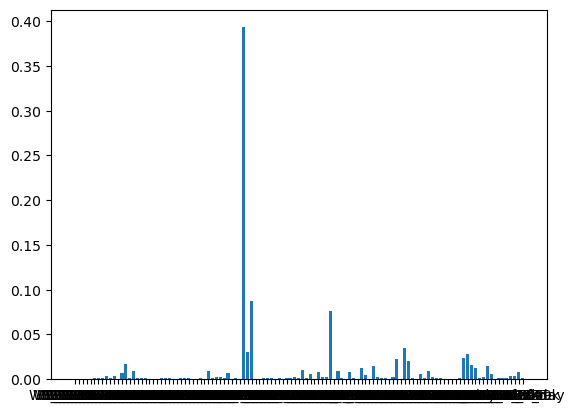

<Axes: >

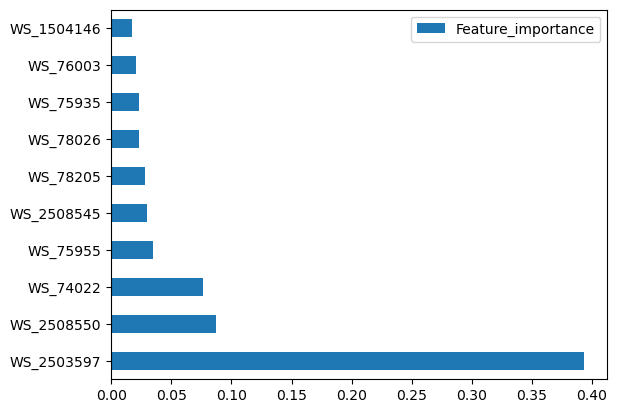

In [176]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=500, random_state=42)
model.fit(X,y)
# display(model.feature_importances_)

x_names = wind_farms_data_linearinterpolated.columns.values[1:]
x_ticks = [tick for tick in range(len(x_names))]
plt.bar(x_ticks, model.feature_importances_)
plt.xticks(x_ticks, x_names)
plt.show()

df =pd.DataFrame(model.feature_importances_, x_names)
df.rename(columns={0: "Feature_importance"}, inplace=True)
pd.set_option('display.max_rows', 500)
df_sorted = df.sort_values(by='Feature_importance', ascending=False).head(10)

df_sorted.plot(kind='barh')

The day and hour, month are not being utilized. 
Testing sine and cosine of these features to enable the model to gauge cycles


In [10]:
# The day and hour, month are not being utilized. Testing sine and cosine of these features


wind_farms_data_linearinterpolated['sine_time_of_day'] = np.sin((wind_farms_data_linearinterpolated['time_of_day']/24)*2*np.pi)
wind_farms_data_linearinterpolated['cosine_time_of_day'] = np.cos((wind_farms_data_linearinterpolated['time_of_day']/24)*2*np.pi)

wind_farms_data_linearinterpolated['cosine_day_of_week'] = np.cos((wind_farms_data_linearinterpolated['day_of_week']/7)*2*np.pi)
wind_farms_data_linearinterpolated['sine_day_of_week'] = np.sin((wind_farms_data_linearinterpolated['day_of_week']/7)*2*np.pi)

wind_farms_data_linearinterpolated['cosine_month'] = np.cos((wind_farms_data_linearinterpolated['month']/12)*2*np.pi)
wind_farms_data_linearinterpolated['sine_month'] = np.sin((wind_farms_data_linearinterpolated['month']/12)*2*np.pi)



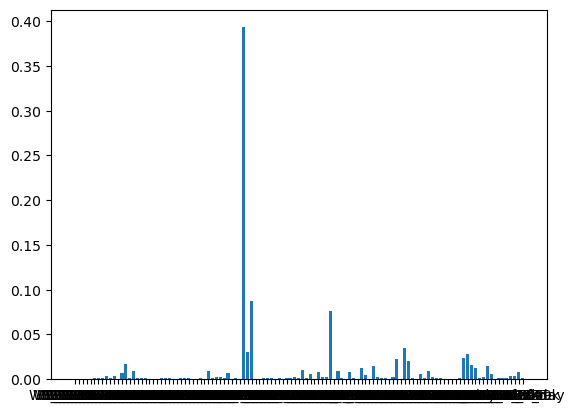

<Axes: title={'center': 'Feature importance, ascending'}>

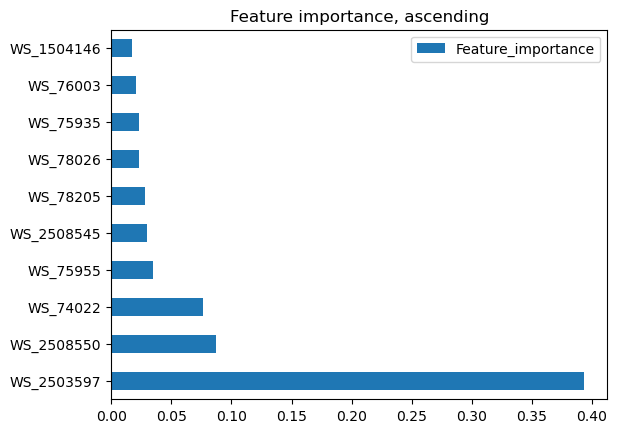

In [161]:
X = wind_farms_data_linearinterpolated.values[:,1:]
y = wind_farms_data_linearinterpolated.values[:,0]

model = XGBRegressor(n_estimators=500, random_state=42)
model.fit(X,y)
# display(model.feature_importances_)

x_names = wind_farms_data_linearinterpolated.columns.values[1:]
x_ticks = [tick for tick in range(len(x_names))]
plt.bar(x_ticks, model.feature_importances_)
plt.xticks(x_ticks, x_names)
plt.show()

df =pd.DataFrame(model.feature_importances_, x_names)
df.rename(columns={0: "Feature_importance"}, inplace=True)
pd.set_option('display.max_rows', 500)
df.sort_values(by='Feature_importance', ascending=False).head(50)

df_sorted = df.sort_values(by='Feature_importance', ascending=False).head(10)

df_sorted.plot(kind='barh', title='Feature importance, ascending') # Display the top n features

In [12]:
sorted_df = df.sort_values(by='Feature_importance', ascending=False).head(30)

In [13]:
list(sorted_df.index.values[:10])

['WS_2503597',
 'WS_2508550',
 'WS_74022',
 'WS_78205',
 'WS_75955',
 'WS_78026',
 'WS_75287',
 'WS_2508545',
 'WS_76003',
 'WS_1504146']

The lag features of the target column "CF" can be utilized as features in boosting trees fopr time series data

In [187]:
# Create lag feature of 24, 25 and 26 hours back. Can utilize rolling mean of the past x days as a feature too.


def add_lags_feature(df: pd.DataFrame,
                     lags: int,
                     skip_lags: int= 23,
                     drop_na: bool =True,
                     target_column: str="CF") -> pd.DataFrame:
    '''
    List data frame 
    '''
    for i in range(0,lags):
        df[f'{target_column}_previous_{i+skip_lags}_hours'] = df[target_column].shift(skip_lags+i)

    return df 

wind_farms_data_add_lags = add_lags_feature(wind_farms_data_linearinterpolated, lags=7*24)



In [189]:
wind_farms_data_add_lags.describe()
wind_farms_data_add_lags['CF_previous_24_hours']

2019-08-07 00:00:00         NaN
2019-08-07 01:00:00         NaN
2019-08-07 02:00:00         NaN
2019-08-07 03:00:00         NaN
2019-08-07 04:00:00         NaN
                         ...   
2020-01-07 19:00:00    0.217996
2020-01-07 20:00:00    0.191656
2020-01-07 21:00:00    0.164187
2020-01-07 22:00:00    0.145858
2020-01-07 23:00:00    0.140943
Name: CF_previous_24_hours, Length: 3696, dtype: float64

In [190]:
wind_farms_data_add_lags.to_parquet(f'{TRANSFORMED_DATA_DIR}/wind_farm_all_features.parquet')

In [15]:
# Once the lags are created there are max lags +1 number of rows that would have nulls. This can be dropped from the training data set
wind_farms_data_add_lags_drop = wind_farms_data_add_lags.dropna()

In [16]:
wind_farms_data_add_lags_drop.describe()

,CF,WS_1133733,WS_1156770,WS_1156968,WS_1182195,WS_1193865,WS_1321569,WS_1324653,WS_1358699,WS_1366338,...,CF_previous_182_hours,CF_previous_183_hours,CF_previous_184_hours,CF_previous_185_hours,CF_previous_186_hours,CF_previous_187_hours,CF_previous_188_hours,CF_previous_189_hours,CF_previous_190_hours,CF_previous_191_hours
count,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,...,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000
mean,0.181784,4.428874,3.859666,5.152826,5.104806,5.454807,2.486762,3.953046,3.503762,5.683738,...,0.187699,0.187617,0.187572,0.187574,0.187579,0.187617,0.187670,0.187754,0.187871,0.188001
std,0.164588,2.774860,2.361858,2.736619,3.249457,2.674921,1.634133,2.404465,2.931290,2.821479,...,0.164958,0.164859,0.164801,0.164803,0.164811,0.164866,0.164947,0.165064,0.165215,0.165401
min,0.003551,0.590000,0.490000,0.680000,0.460000,0.530000,0.500000,0.310000,0.240000,0.570000,...,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551,0.003551
25%,0.041404,2.180000,2.000000,2.870000,2.770000,3.210000,1.480000,1.860000,1.410000,3.310000,...,0.044333,0.044333,0.044333,0.044333,0.044333,0.044333,0.044333,0.044333,0.044333,0.044333
50%,0.124802,3.530000,3.110000,4.820000,4.410000,5.260000,2.000000,3.390000,2.520000,5.540000,...,0.133269,0.133269,0.133269,0.133269,0.133269,0.133269,0.133269,0.133269,0.133269,0.133269
75%,0.286852,6.380000,5.320000,6.880000,6.510000,7.500000,2.920000,5.780000,4.540000,7.860000,...,0.300704,0.300199,0.300199,0.300199,0.300199,0.300199,0.300199,0.300704,0.301024,0.301865
max,0.733128,14.660000,13.130000,14.640000,23.040000,17.430000,13.200000,11.810000,19.150000,17.090000,...,0.733128,0.733128,0.733128,0.733128,0.733128,0.733128,0.733128,0.733128,0.733128,0.733128


array([6.89243025e-05, 2.51048419e-04, 1.76340836e-04, 8.08318000e-05,
       2.44401424e-04, 1.67156759e-04, 6.57247496e-04, 6.38470694e-04,
       1.05159287e-03, 4.53429203e-03, 2.97735241e-04, 6.68496941e-05,
       4.30771569e-03, 1.30650317e-02, 1.16149581e-03, 2.43173004e-03,
       2.41511548e-03, 1.49513897e-03, 1.25141081e-03, 1.93642845e-04,
       8.08729266e-04, 1.26300938e-03, 3.18748935e-04, 1.24836620e-03,
       4.67907637e-04, 2.77568703e-04, 2.31985992e-04, 1.55008180e-04,
       3.47353140e-04, 1.55533617e-05, 1.01228280e-03, 2.34112595e-04,
       1.01864818e-04, 1.25906861e-03, 8.42308812e-03, 4.72610147e-04,
       7.59521557e-04, 1.56362297e-03, 8.86760012e-04, 1.01668527e-02,
       1.72352011e-04, 1.54642898e-04, 2.85794231e-04, 2.87390321e-01,
       2.27208948e-03, 1.08578026e-01, 2.87026865e-04, 6.33118034e-04,
       1.46366030e-04, 1.86503623e-02, 2.28459854e-03, 1.98014910e-04,
       1.12530601e-03, 1.14859093e-03, 2.27713783e-04, 1.59699339e-04,
      

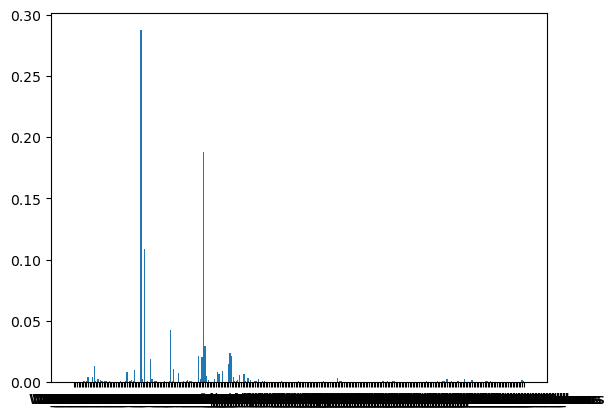

<Axes: title={'center': 'Feature importance, ascending'}>

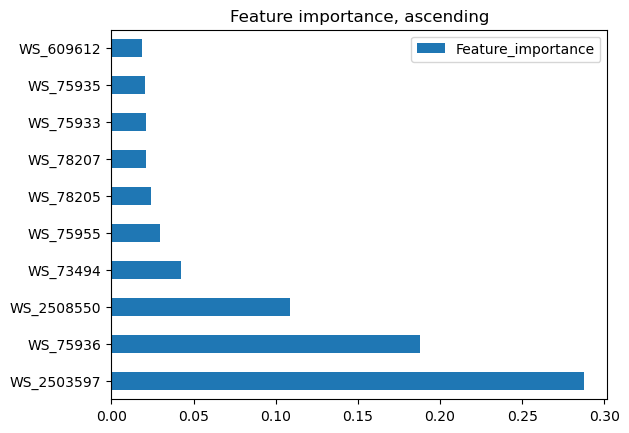

In [163]:
X = wind_farms_data_add_lags_drop.values[:,1:]
y = wind_farms_data_add_lags_drop.values[:,0]

model = XGBRegressor(n_estimators=500, random_state=42)
model.fit(X,y)
display(model.feature_importances_)

x_names = wind_farms_data_add_lags_drop.columns.values[1:]
x_ticks = [tick for tick in range(len(x_names))]
plt.bar(x_ticks, model.feature_importances_)
plt.xticks(x_ticks, x_names)
plt.show()

df =pd.DataFrame(model.feature_importances_, x_names)
df.rename(columns={0: "Feature_importance"}, inplace=True)
pd.set_option('display.max_rows', 500)
df.sort_values(by='Feature_importance', ascending=False).head(50)

df_sorted = df.sort_values(by='Feature_importance', ascending=False).head(10)

df_sorted.plot(kind='barh', title='Feature importance, ascending') # Display the top n features

In [110]:
features_required = df.sort_values(by='Feature_importance', ascending=False).head(10)

In [182]:
target_features_required = ['CF'] + list(features_required.index) + ['cosine_time_of_day'] + ['cosine_day_of_week'] + ['sine_month']
target_features_required

['CF',
 'WS_2503597',
 'WS_75936',
 'WS_2508550',
 'WS_73494',
 'WS_75955',
 'WS_78205',
 'WS_78207',
 'WS_75933',
 'WS_75935',
 'WS_609612',
 'cosine_time_of_day',
 'cosine_day_of_week',
 'sine_month']

In [183]:
wind_farms_data_topn_features = wind_farms_data_add_lags_drop[target_features_required]
wind_farms_data_topn_features.to_parquet(f'{TRANSFORMED_DATA_DIR}/wind_farm_topn_features.parquet')

Creating time series splits to train and test the model.    
The order of the temporal data is maintained by splitting sequentially.   

In [181]:
from sklearn.model_selection import TimeSeriesSplit
from typing import List, Dict, Tuple
# Create Multiple folds of train and test data sets

target_features_required = ['CF'] + list(features_required.index) + ['cosine_time_of_day'] + ['cosine_day_of_week'] + ['sine_month']

# target_features_required = list(wind_farms_data_add_lags_drop.columns)
wind_farms_data_topn_features = wind_farms_data_add_lags_drop[target_features_required]

output = {}
time_split = TimeSeriesSplit(gap=24, test_size=93, n_splits=10, max_train_size=720) # The predicted values are 93 in number and a day's data is not available.
for i, (train_index, test_index) in enumerate(time_split.split(wind_farms_data_topn_features)):
        
        X_train = wind_farms_data_topn_features.iloc[train_index, 1:]
        y_train = wind_farms_data_topn_features.iloc[train_index, 0]
        X_test = wind_farms_data_topn_features.iloc[test_index, 1:]
        y_test = wind_farms_data_topn_features.iloc[test_index, 0]
        output[X_train.index.max()] = (X_train, y_train, X_test, y_test)


def train_test_kfolds(df: pd.DataFrame, time_split:TimeSeriesSplit, features_target: List) -> Dict(Tuple):
        '''
        Create time series split of k folds based on the TimeSeriesSplit object
        The key in the returned dictionary is the last date of the training set
        The value is a Tuple of (X_train, y_train, X_test, y_test) 
        The first column of the dataframe should be the target column 
        The dataframe should have timeseries index


        '''
        output= {}
        df_topnfeatures = df[features_target]
        for i, (train_index, test_index) in enumerate(time_split.split(wind_farms_data_topn_features)):
        
                X_train = df_topnfeatures.iloc[train_index, 1:]
                y_train = df_topnfeatures.iloc[train_index, 0]
                X_test = df_topnfeatures.iloc[test_index, 1:]
                y_test = df_topnfeatures.iloc[test_index, 0]
                output[X_train.index.max()] = (X_train, y_train, X_test, y_test)
                
        return output


In [138]:
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
result = {}
params = {'subsample': 0.8, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7} # Identified with Grid Search of params
# {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
fig = px.line(
    wind_farms_data_topn_features,
    x=wind_farms_data_topn_features.index,
    y="CF",
    markers=True,
    hover_data=["CF"]
)
for key, value in output.items():

    X_train, y_train, X_test, y_test = output[key]
    model = XGBRegressor(n_estimators=100, random_state=42, eta=0.1, colsample_bytree=0.8, subsample=0.7, max_depth=5, min_child_weight=3 )
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    result[key]= (mean_absolute_error(y_test, predictions), mean_absolute_percentage_error(y_test, predictions))

    fig.add_trace(go.Scatter(x=y_test.index, y=predictions, mode='lines', name=str(key), line=dict(color='red')))

print(f"Mean abs percentage error:{np.mean([v[1] for v in result.values()])}")

print(f"Mean abs error:{np.mean([v[0] for v in result.values()])})")

c:\Users\gkris\.conda\envs\vistra\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Mean abs percentage error:0.46672723569001395
Mean abs error:0.04187788504331024)


In [128]:
X_train

,WS_2503597,WS_75936,WS_2508550,WS_73494,WS_75955,WS_78205,WS_78207,WS_75933,WS_75935,WS_609612,cosine_time_of_day,cosine_day_of_week,sine_month
2019-11-20 03:00:00,1.82,3.71,3.26,3.24,5.91,1.79,1.52,3.64,3.90,1.55,7.071068e-01,-0.222521,-5.000000e-01
2019-11-20 04:00:00,1.63,3.31,2.95,2.91,6.15,2.12,1.82,3.48,3.49,2.02,5.000000e-01,-0.222521,-5.000000e-01
2019-11-20 05:00:00,1.73,3.12,2.94,2.82,5.71,2.15,1.96,3.31,3.23,2.05,2.588190e-01,-0.222521,-5.000000e-01
2019-11-20 06:00:00,1.55,2.88,2.76,2.63,6.02,2.48,2.27,2.71,2.89,2.48,6.123234e-17,-0.222521,-5.000000e-01
2019-11-20 07:00:00,1.71,2.33,2.14,2.22,5.60,2.29,2.19,2.76,2.37,2.26,-2.588190e-01,-0.222521,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-19 22:00:00,2.58,2.33,2.38,1.99,1.51,3.01,2.10,2.01,2.42,3.29,8.660254e-01,-0.900969,-2.449294e-16
2019-12-19 23:00:00,3.22,2.74,2.92,2.76,1.71,2.94,2.02,2.42,2.75,3.22,9.659258e-01,-0.900969,-2.449294e-16
2019-12-20 00:00:00,3.14,3.05,3.31,3.65,1.88,3.14,2.80,3.12,2.89,3.43,1.000000e+00,-0.900969,-2.449294e-16
2019-12-20 01:00:00,2.45,2.93,3.09,3.40,1.92,3.75,3.10,3.08,2.86,3.94,9.659258e-01,-0.900969,-2.449294e-16


In [139]:
fig.show()

In [116]:
!pip install ruptures

   ---------------------------------------- 0.0/473.0 kB ? eta -:--:--
   -- ------------------------------------- 30.7/473.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 473.0/473.0 kB 7.3 MB/s eta 0:00:00


In [121]:
# Breakpoints: DatetimeIndex(['2019-09-04 08:00:00', '2019-10-07 16:00:00',
            #    '2019-10-11 10:00:00', '2020-01-03 02:00:00'],
            #   dtype='datetime64[ns]', freq=None)

# Utilize breakpoints to identify training points 
import ruptures as rpt 
n_breaks = 4

y = np.array(y_train.tolist())
model = rpt.Dynp(model="l1")
model.fit(y)
breaks = model.predict(n_bkps=n_breaks-1)

breaks_rpt = []
for i in breaks:
    breaks_rpt.append(y_train.index[i-1])
breaks_rpt = pd.to_datetime(breaks_rpt)
breaks_rpt


DatetimeIndex(['2020-01-03 02:00:00'], dtype='datetime64[ns]', freq=None)

In [93]:


fig.show() 

In [59]:
result

{Timestamp('2019-12-27 23:00:00'): (0.05270823575475377, 0.36632055267765856),
 Timestamp('2019-12-28 23:00:00'): (0.022601263352442207, 0.2646964052377669),
 Timestamp('2019-12-29 23:00:00'): (0.07832717721123438, 0.31415965118429506),
 Timestamp('2019-12-30 23:00:00'): (0.01993412198871881, 0.4537336147891833),
 Timestamp('2019-12-31 23:00:00'): (0.053514680939836294, 0.35920261563423156),
 Timestamp('2020-01-01 23:00:00'): (0.03704256823560634, 0.3737762970514091),
 Timestamp('2020-01-02 23:00:00'): (0.05153573087056473, 0.3905093255502579),
 Timestamp('2020-01-03 23:00:00'): (0.030169738346572203, 0.9513868678669929),
 Timestamp('2020-01-04 23:00:00'): (0.05199203733137492, 0.9379748498028017),
 Timestamp('2020-01-05 23:00:00'): (0.021498010484946244, 1.0132809119259896)}

In [103]:
import lightgbm as lgb



result = {}


fig = px.line(
    wind_farms_data_topn_features,
    x=wind_farms_data_topn_features.index,
    y="CF",
    markers=True,
    hover_data=["CF"]
)
for key, value in output.items():

    X_train, y_train, X_test, y_test = output[key]
    model = lgb.LGBMRegressor()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    result[key]= (mean_absolute_error(y_test, predictions), mean_absolute_percentage_error(y_test, predictions))

    fig.add_trace(go.Scatter(x=y_test.index, y=predictions, mode='lines', name=str(key), line=dict(color='red')))

print(f"Mean abs percentage error:{np.mean([v[1] for v in result.values()])}")

print(f"Mean abs error:{np.mean([v[0] for v in result.values()])})")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005512 seconds.
You can set `force_col_wise=true` to remove the overhead.


c:\Users\gkris\.conda\envs\vistra\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



[LightGBM] [Info] Total Bins 71502
[LightGBM] [Info] Number of data points in the train set: 3241, number of used features: 289
[LightGBM] [Info] Start training from score 0.185107
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003848 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71502
[LightGBM] [Info] Number of data points in the train set: 3265, number of used features: 289
[LightGBM] [Info] Start training from score 0.184872
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71502
[LightGBM] [Info] Number of data points in the train set: 3289, number of used features: 289
[LightGBM] [Info] Start training from score 0.184570
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005046 seconds.
You can set `force_col_wise=t

In [137]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit

# Example time series dataset
# X, y = X_train, y_train  # your time series data

X = wind_farms_data_add_lags_drop.values[:,1:]
y = wind_farms_data_add_lags_drop.values[:,0]


# Create a time series cross-validator
tscv = TimeSeriesSplit(gap=24, test_size=93, n_splits=10, max_train_size=720)

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# XGBRegressor
xgb_reg = XGBRegressor()

# Randomized search
random_search = RandomizedSearchCV(xgb_reg, param_grid, n_iter=50, 
                                   scoring='neg_mean_absolute_error', 
                                   cv=tscv, random_state=42)

random_search.fit(X, y)

# Best parameters
print(random_search.best_params_)

{'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
